## Data Modelling using Python

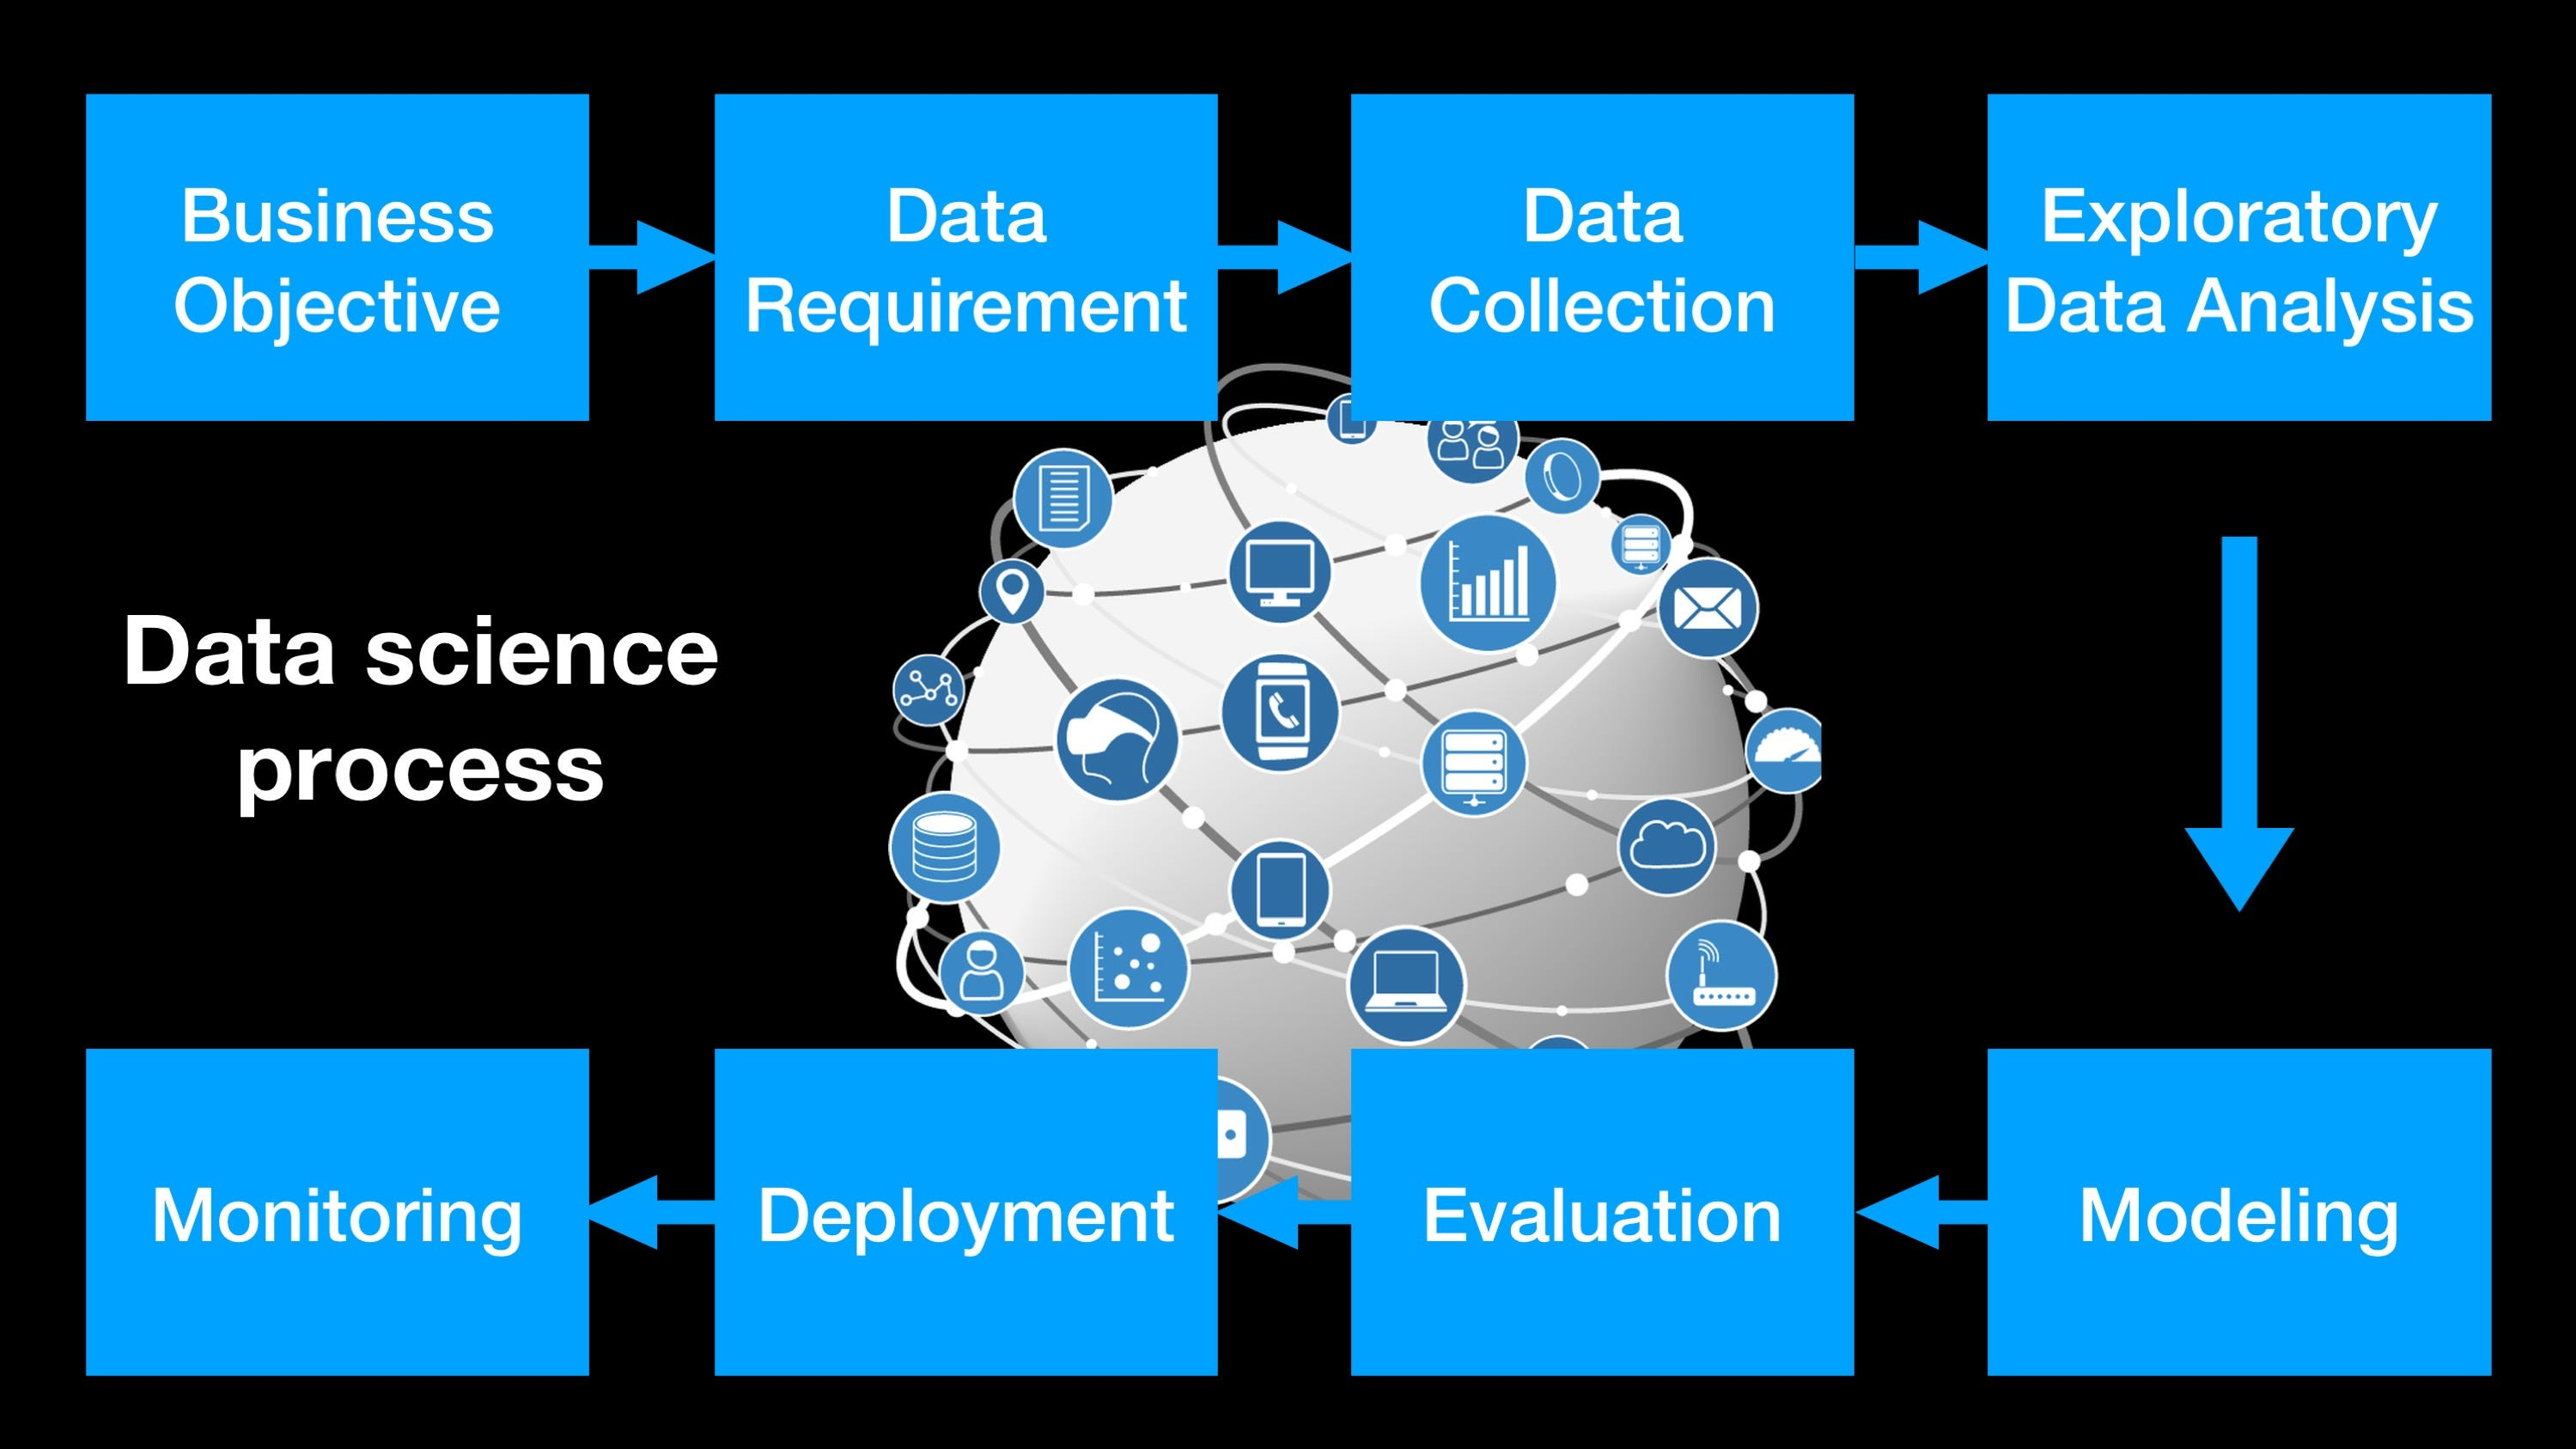

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


## Statistical Description using Pandas

In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
df.describe(include="object")

,label
count,2200
unique,22
top,rice
freq,100




### Let's make the data ready for machine learning model

In [6]:
c=df.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df['target']=c.cat.codes

y=df.target
X=df[['N','P','K','temperature','humidity','ph','rainfall']] 

In [8]:
df['target'].tail()

2195    5
2196    5
2197    5
2198    5
2199    5
Name: target, dtype: int8

**Correlation visualization between features. We can see how Phosphorous levels and Potassium levels are highly correlated.**


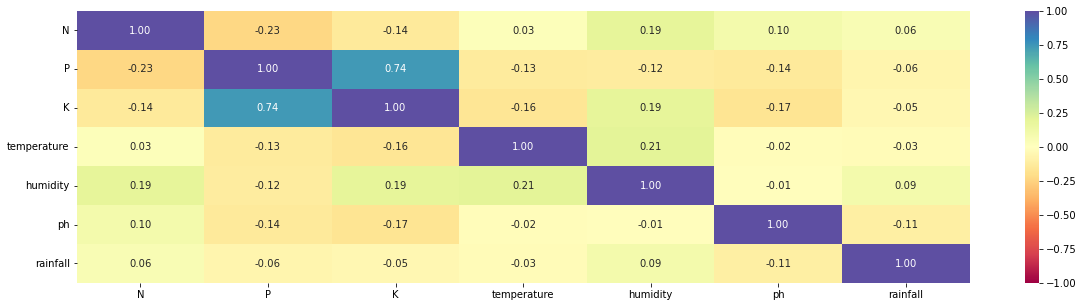

In [9]:

plt.figure(figsize=(20, 5))
sns.heatmap(X.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

# FEATURE SCALING
**Feature scaling is required before creating training data and feeding it to the model.**



In [12]:

10/1000,100/1000,1000/1000


(0.01, 0.1, 1.0)

In [13]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,target
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1,test_size=.2)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)

# Data Modelling

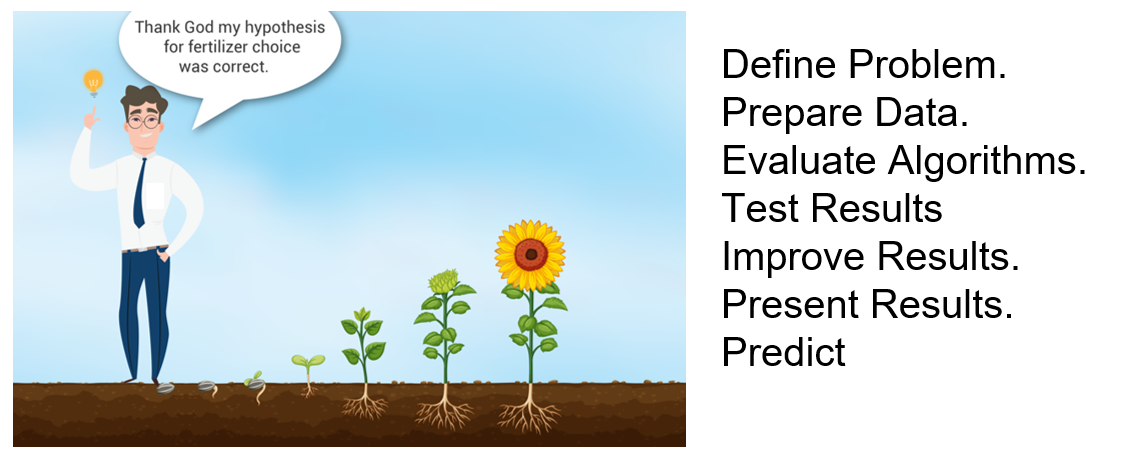

## KNN Classifier for Crop prediction. 

## KNN Introduction
- K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions).

# KNN algorithm 
 
- One of the simplest of all the supervised machine learning algorithms. It simply calculates the distance of a new data point to all other training data points. 
-  K can be any integer. K=3 mean ( find the 3 nearest points)
- The KNN algorithm starts by calculating the distance of point(Euclidean or Manhattan ) X from all the points.
- Finally it assigns the data point to the class to which the majority of the K data points belong.

## Note 
The model for KNN is the entire training dataset. When a prediction is required for a unseen data instance, the kNN algorithm will search through the training dataset for the k-most similar instances. The prediction attribute of the most similar instances is summarized and returned as the prediction for the unseen instance.

number of cLasess, sqr(total data points)

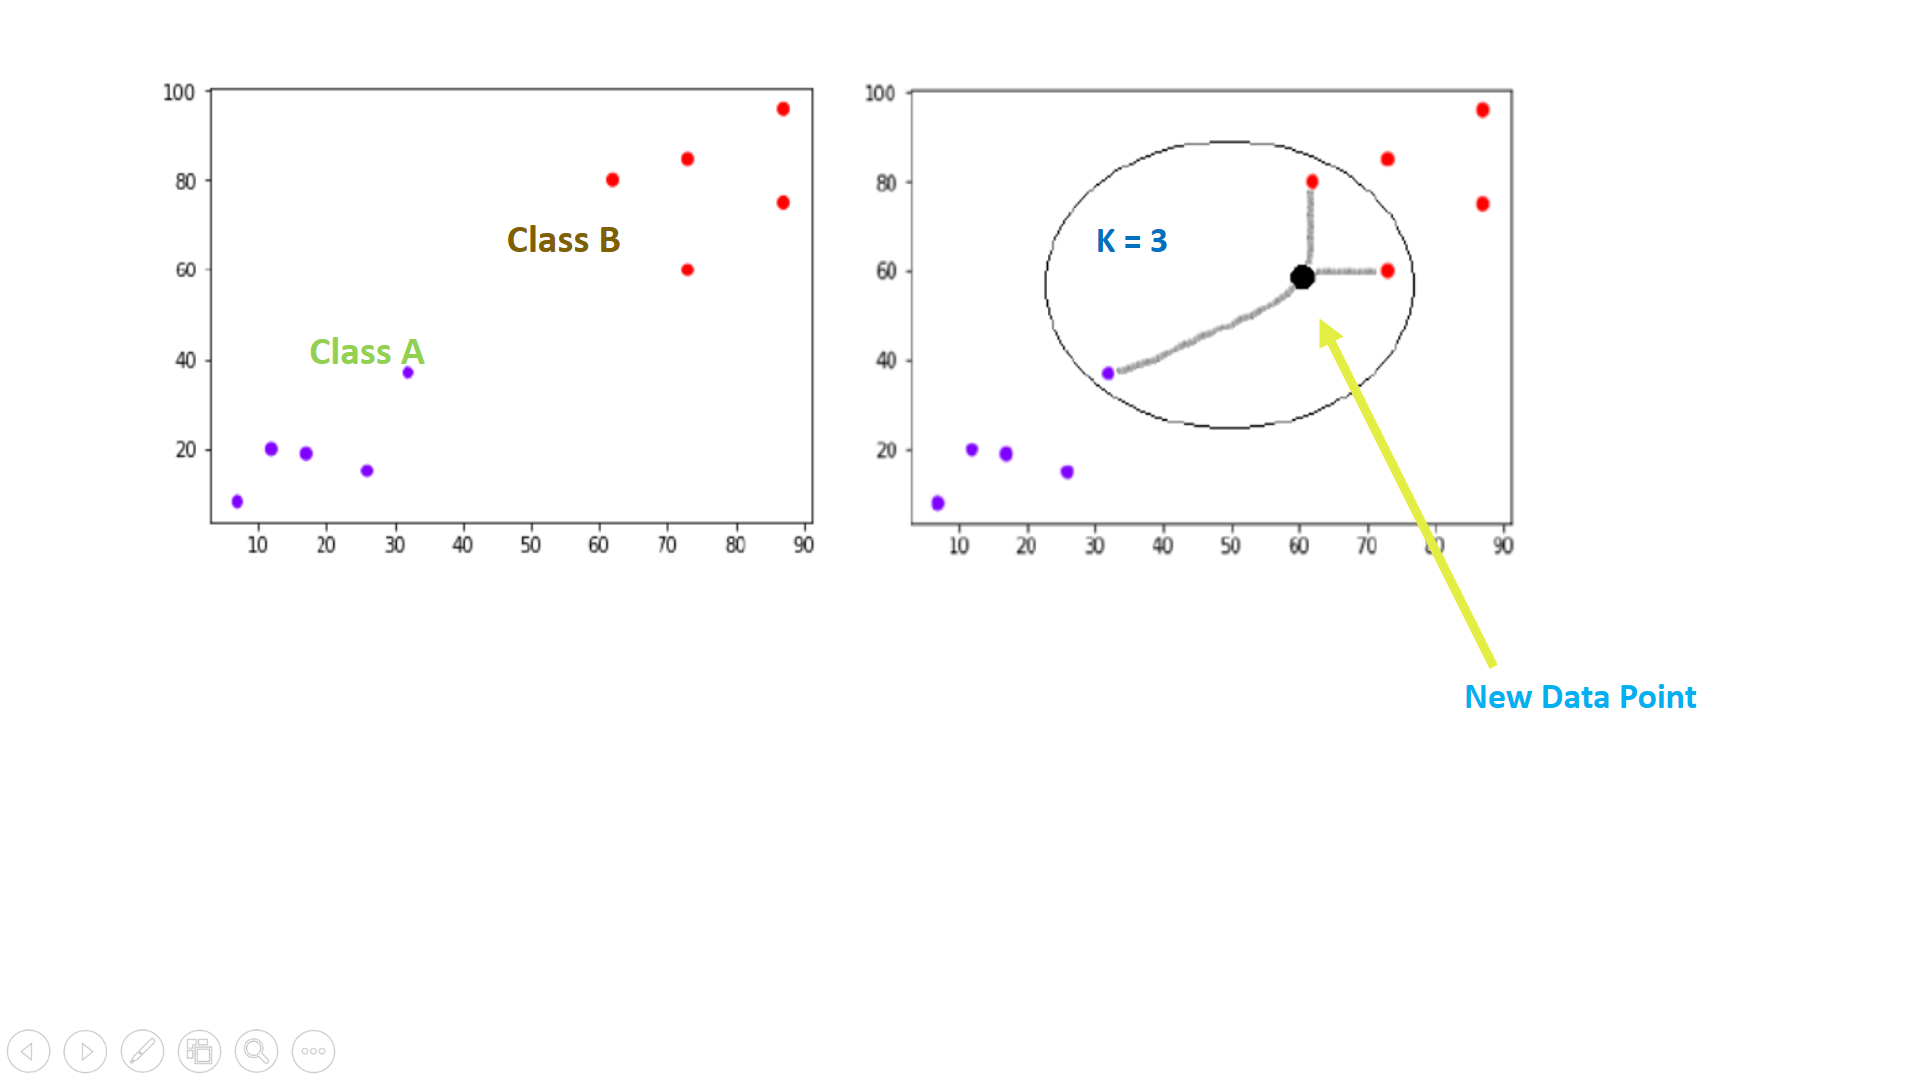

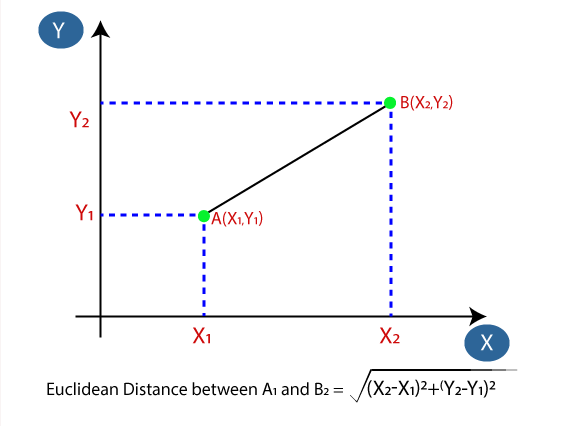

In [26]:
a= [[0], [1],[2] ,[3],[4],[5],[6],[7],[8],[10],[12],[13],[16],[15]]
b = [0, 0, 0, 0,0,0,0,1,1,1,1,1,1,1]
from sklearn.neighbors import KNeighborsClassifier
dummy = KNeighborsClassifier(n_neighbors=4)
dummy.fit(a, b) 

KNeighborsClassifier(n_neighbors=4)

In [27]:
print("Prediction=",dummy.predict([[4.5],[9]]))

Prediction= [0 1]


In [28]:
print("Prediction Probability = ",dummy.predict_proba([[4.5],[9]]))

Prediction Probability =  [[1.   0.  ]
 [0.25 0.75]]


In [29]:
print("Closed Neighbours ", dummy.kneighbors([[9]]))

Closed Neighbours  (array([[1., 1., 2., 3.]]), array([[8, 9, 7, 6]], dtype=int64))


In [30]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,target
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5


In [31]:
y=df.target
X=df[['N','P','temperature','humidity','ph','rainfall']] 

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30)


In [33]:
from sklearn.neighbors import KNeighborsClassifier
crop_p = KNeighborsClassifier(n_neighbors=7)
crop_p.fit(X_train, y_train)
crop_p.score(X_test, y_test)

0.9424242424242424

In [34]:
y_pred = crop_p.predict(X_test)

### Confusion Matrix

In [35]:
from sklearn.metrics import multilabel_confusion_matrix
cnf_matrix=multilabel_confusion_matrix(y_test, y_pred,
                            
                          labels=[0 ,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22])

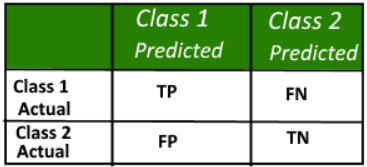
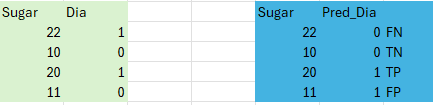

In [36]:
cnf_matrix

array([[[622,   0],
        [  0,  38]],

       [[638,   0],
        [  0,  22]],

       [[628,   0],
        [  0,  32]],

       [[624,   7],
        [  0,  29]],

       [[633,   0],
        [  0,  27]],

       [[634,   0],
        [  1,  25]],

       [[625,   3],
        [  0,  32]],

       [[630,   0],
        [  0,  30]],

       [[623,   5],
        [  1,  31]],

       [[624,   2],
        [  7,  27]],

       [[633,   1],
        [  0,  26]],

       [[625,   0],
        [  3,  32]],

       [[627,   0],
        [  0,  33]],

       [[636,   0],
        [  1,  23]],

       [[629,   1],
        [  0,  30]],

       [[641,   0],
        [  0,  19]],

       [[625,   3],
        [ 15,  17]],

       [[632,   0],
        [  1,  27]],

       [[623,   0],
        [  2,  35]],

       [[619,  15],
        [  3,  23]],

       [[628,   1],
        [  4,  27]],

       [[660,   0],
        [  0,   0]]], dtype=int64)

### Let's try different values of n_neighbors to fine tune and get better results

In [37]:

from sklearn.metrics import accuracy_score
for K in range(0,7):
  K_value = K+1
  neigh = KNeighborsClassifier(n_neighbors = K_value)
  neigh.fit(X_train, y_train)
  y_pred = neigh.predict(X_test)
  print("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)

Accuracy is  94.39393939393939 % for K-Value: 1
Accuracy is  93.63636363636364 % for K-Value: 2
Accuracy is  94.84848484848484 % for K-Value: 3
Accuracy is  94.39393939393939 % for K-Value: 4
Accuracy is  93.78787878787878 % for K-Value: 5
Accuracy is  93.78787878787878 % for K-Value: 6
Accuracy is  94.24242424242424 % for K-Value: 7


In [40]:
import numpy as np
X_new=[80.000000,45.000000,10.598693,120.473146,12.425045,120.867624]

X_new=pd.Series(X_new)

In [41]:
Prediction= crop_p.predict([X_new])

In [42]:

print("Prediction: {}".format(Prediction))
print("Predicted target name: {}".format(df['label'][Prediction]))

Prediction: [17]
Predicted target name: 17    rice
Name: label, dtype: object


## Classification using Support Vector Classifer (SVC)


SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

    1.Linear
    2.Polynomial
    3.Radial basis function (RBF)
    4.Sigmoid
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results. 
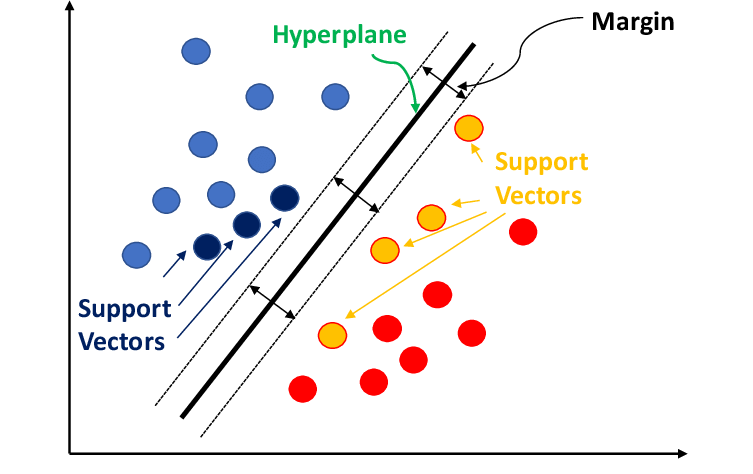

In [ ]:
from sklearn.svm import SVC

svc_linear = SVC(kernel = 'linear').fit(X_train, y_train)
print("Linear Kernel Accuracy: ",svc_linear.score(X_test,y_test))

svc_poly = SVC(kernel = 'rbf').fit(X_train, y_train)
print("Rbf Kernel Accuracy: ", svc_poly.score(X_test,y_test))

svc_poly = SVC(kernel = 'poly').fit(X_train, y_train)
print("Poly Kernel Accuracy: ", svc_poly.score(X_test,y_test))

### Let's try to increase SVC Linear model accuracy by parameter tuning.

**GridSearchCV can help us find the best parameters.**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

parameters = {'C': np.logspace(-3, 2, 6).tolist(), 'gamma': np.logspace(-3, 2, 6).tolist()}
# 'degree': np.arange(0,5,1).tolist(), 'kernel':['linear','rbf','poly']

model = GridSearchCV(estimator = SVC(kernel="linear"), param_grid=parameters, n_jobs=-1, cv=4)
model.fit(X_train, y_train)

In [ ]:
print(model.best_score_ )
print(model.best_params_ )

## Insights

- KNN and SVC both algorithms are giving 75% accuracy
- We can prefer SVC for this prection
- Make sure we are not taking K and P together as they are highly correlated